In [4]:
from neuron import h
from neuron.units import ms, mV, µm
import matplotlib.pyplot as plt
import numpy as np

h.load_file("stdrun.hoc")

1.0

In [5]:
# create myelinateaxon
class MyelinatedAxon:
    def __init__(self, gid):
        self.gid = gid
        self.axon = h.Section(name=f"myelinated_axon_{gid}")
        self.axon.nseg = 50
        self.axon.L = 20000 * μm
        self.axon.diam = 8 * μm

        # axon data
        self.axon.insert("pas")
        self.axon.g_pas = 1
        self.axon.cm = 0.5e3 * self.axon.g_pas
        self.axon.e_pas = 0

        #  extracellular 
        self.axon.insert("extracellular")
        for seg in self.axon:
            seg.xraxial[0] = 1e9
            seg.xg[0] = 1
            seg.xc[0] = 0

        # record inside and outside data
        self.v_m = h.Vector().record(self.axon(0.5)._ref_v)
        self.v_ext = h.Vector().record(self.axon(0.5)._ref_vext[0])


In [6]:
# create unmyelinateaxon
class UnmyelinatedAxon:
    def __init__(self, gid):
        self.gid = gid
        self.axon = h.Section(name=f"unmyelinated_axon_{gid}")
        self.axon.nseg = 50
        self.axon.L = 20000 * μm
        self.axon.diam = 3 * μm

        # axon data
        self.axon.insert("pas")
        self.axon.g_pas = 1
        self.axon.cm = 0.5e3 * self.axon.g_pas
        self.axon.e_pas = 0

        #  extracellular 
        self.axon.insert("extracellular")
        for seg in self.axon:
            seg.xraxial[0] = 1e9
            seg.xg[0] = 1
            seg.xc[0] = 0

        # record inside and outside data
        self.v_m = h.Vector().record(self.axon(0.5)._ref_v)
        self.v_ext = h.Vector().record(self.axon(0.5)._ref_vext[0])

In [7]:
# design myelinated and unmyelinated
myelinated_axons = [MyelinatedAxon(i) for i in range(5)]
unmyelinated_axons = [UnmyelinatedAxon(i) for i in range(10)]

In [8]:
# record simulation time
t = h.Vector().record(h._ref_t)

In [ ]:
# # same simulation
# stim = h.IClamp(myelinated_axons[0].axon(0.5))  
# stim.delay = 10 * ms
# stim.dur = 1 * ms
# #stim.amp = 1 * (np.pi * myelinated_axons[0].axon.diam * myelinated_axons[0].axon.L / 100)
# stim.amp = 100

ics = [h.IClamp(cell.axon(0.2)) for cell in myelaxons + unmyelaxons]
for iclamp in ics:
    iclamp.delay = 1 * ms
    iclamp.dur = 1 * ms
    iclamp.amp = 10



In [10]:
# simulation
h.finitialize(-65 * mV)
h.continuerun(10 * ms)

0.0

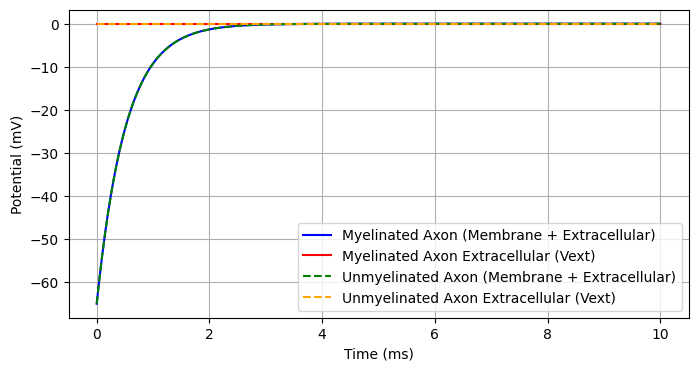

In [11]:
# plot
plt.figure(figsize=(8, 4))
plt.plot(t, np.array(myelinated_axons[0].v_m) + np.array(myelinated_axons[0].v_ext),
         label="Myelinated Axon (Membrane + Extracellular)", color='blue')
plt.plot(t, myelinated_axons[0].v_ext, label="Myelinated Axon Extracellular (Vext)", color='red')
plt.plot(t, np.array(unmyelinated_axons[0].v_m) + np.array(unmyelinated_axons[0].v_ext),
         label="Unmyelinated Axon (Membrane + Extracellular)", linestyle='dashed', color='green')
plt.plot(t, unmyelinated_axons[0].v_ext, label="Unmyelinated Axon Extracellular (Vext)", linestyle='dashed', color='orange')

plt.xlabel("Time (ms)")
plt.ylabel("Potential (mV)")
plt.legend()
plt.grid()
plt.show()